# Investment Case Study

In [75]:
import pandas as pd
companies = pd.read_csv('./companies.txt', sep='\t' ,encoding = "ISO-8859-1")
rounds2 = pd.read_csv('./rounds2.csv', encoding = "ISO-8859-1")

In [76]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
len(rounds2['company_permalink'].unique().tolist())

66370

Unique companies are present in 'rounds2' dataframe - 66370

In [77]:
companies['permalink'] = companies['permalink'].str.lower()
len(companies['permalink'].unique().tolist())

66368

Unique companies are present in 'companies' dataframe - 66368

In the companies data frame, column 'permalink' can be used as the unique key for each company.
There are companies in the rounds2 file which are not present in companies.

master_frame - Merging two dataframes

In [78]:
master_frame = pd.merge(companies, rounds2, how='inner', left_on='permalink', right_on='company_permalink')
master_frame = master_frame.drop('company_permalink', axis=1)
print(master_frame)

                                                permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
5                          /organization/004-technologies   
6                        /organization/01games-technology   
7                     /organization/0ndine-biomedical-inc   
8                     /organization/0ndine-biomedical-inc   
9                                    /organization/0xdata   
10                                   /organization/0xdata   
11                                   /organization/0xdata   
12                                   /organization/0xdata   
13                                        /organization/1   
14                                        /organization/1   
15                      

'master_frame' dataframe has 114942 rows

In [79]:
print(master_frame.columns)

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')


In [80]:
import numpy as np
#Removing rows that has invalid 'raised_amount_used'
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].mean()

,funding_round_type,raised_amount_usd
0,angel,9.586945e+05
1,convertible_note,1.453439e+06
2,debt_financing,1.704353e+07
3,equity_crowdfunding,5.383682e+05
4,grant,4.300576e+06
5,non_equity_assistance,4.112031e+05
6,post_ipo_debt,1.687046e+08
7,post_ipo_equity,8.218249e+07
8,private_equity,7.330859e+07
9,product_crowdfunding,1.363131e+06


# Venture is the most suitable investment type for Spark Funds as it is the highest in the range 5 - 15 million USD. Let us verify using plots as well as plots speak more than words

In [81]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [82]:
#Observing lots of Nan in 'funding_round_code', 'founded_at'. Also the column seems not important.
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [83]:
# Also these columns don't have importance
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

'country_code' and 'category_list' have some missing values. We cannot drop the column or row as the columns of these two tables are important. But can impute the values to reach to the state there is no null values i.e NaN

In [84]:
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = 'NOT_AVAILABLE'
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = 'NOT_AVAILABLE'
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [85]:
#Interested in only 4 funding_round_type. Hence we can still reduce the master_frame
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
master_frame.shape

(80626, 9)

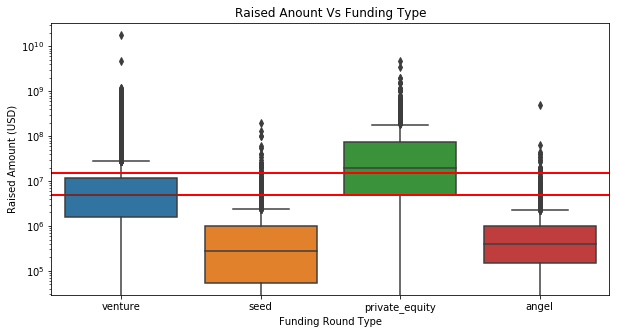

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.title('Raised Anount Vs Funding Type')
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount (USD)')
plt.axhline(y=5000000, linewidth=2, color = 'r')
plt.axhline(y=15000000, linewidth=2, color = 'r')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


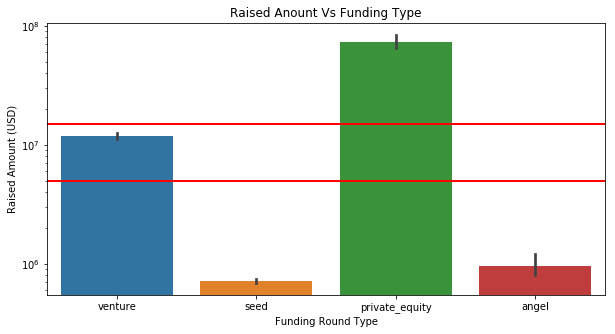

In [87]:
plt.figure(figsize=(10, 5))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.title('Raised Anount Vs Funding Type')
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount (USD)')
plt.axhline(y=5000000, linewidth=2, color = 'r')
plt.axhline(y=15000000, linewidth=2, color = 'r')
plt.show()

# Hence we can conclude Venture is the best fit to invest as the budget is between 5 to 15M USD

In [88]:
#Let us narrow down the master frame only to 'Venture'
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
print(master_frame)
print(master_frame.shape)

                                                permalink  \
0                                     /organization/-fame   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
8                     /organization/0ndine-biomedical-inc   
10                                   /organization/0xdata   
11                                   /organization/0xdata   
12                                   /organization/0xdata   
22                             /organization/1-mainstream   
28                          /organization/10-minutes-with   
34                             /organization/1000memories   
38                          /organization/1000museums-com   
39                          /organization/1000museums-com   
41                          /organization/1000museums-com   
44                          /organization/1000museums-com   
46                               /organization/1001-menus   
47                      

In [89]:
# Find countries that have good sum of 'raised_amount_usd'
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA              4.225108e+11
CHN              3.983542e+10
NOT_AVAILABLE    2.550611e+10
GBR              2.024563e+10
IND              1.439186e+10
CAN              9.583332e+09
FRA              7.259537e+09
ISR              6.907515e+09
DEU              6.346960e+09
JPN              3.363677e+09
SWE              3.254953e+09
NLD              2.939404e+09
CHE              2.827560e+09
SGP              2.793918e+09
ESP              1.835831e+09
Name: raised_amount_usd, dtype: float64

In [90]:
#Finding top 9 countries
# Excluding 'NOT_AVAILABLE' from the list of top 9 countries
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


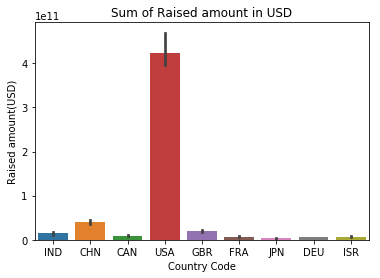

In [91]:
#Top 9 in plots
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum of Raised amount in USD")
plt.xlabel('Country Code')
plt.ylabel('Raised amount(USD)')
plt.show()

In [92]:
#From the top 9 companies, English speaking countries are 'USA', 'GBR', 'IND', 'CAN'. Filter out first three
top_eng_countries = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top_eng_countries.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
Name: raised_amount_usd, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


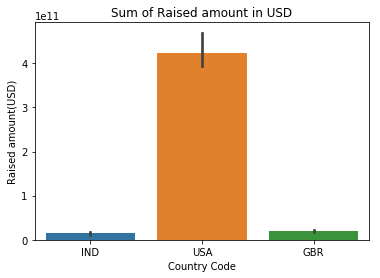

In [93]:
# Top English speaking countries in plot
sns.barplot(x="country_code", y="raised_amount_usd", data=top_eng_countries, estimator=sum)
plt.title("Sum of Raised amount in USD")
plt.xlabel('Country Code')
plt.ylabel('Raised amount(USD)')
plt.show()

# Top English Speaking Countries
# 1. USA
# 2. GBR
# 3. IND

In [94]:
# Primary Sector that has multiple sub sectors. Filering out only the first value in | and assigning to 'primary_sector'
def first_from_multiple_sub_sectors(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value
    
top_eng_countries['primary_sector'] = top_eng_countries['category_list'].apply(first_from_multiple_sub_sectors)
top_eng_countries['primary_sector'] = top_eng_countries['primary_sector'].str.lower()
top_eng_countries.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps


In [95]:
mapping = pd.read_csv("./mapping.csv", encoding = "ISO-8859-1")
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [96]:
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head(10)

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [97]:
# Column value is no more needed
mapping = mapping.drop('value', axis=1)

In [98]:
# Renaming column name by matching with'top_eng_countries'
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
# Convering the column primary sector to lowercase as we need to perform join with 'top_eng_countries' (To match)
mapping['primary_sector'] = mapping['primary_sector'].str.lower()
mapping.head(10)
# primary sector created in 'mapping'

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports
57,bicycles,Automotive & Sports
69,boating industry,Automotive & Sports
87,cad,Automotive & Sports
93,cars,Automotive & Sports
188,design,Automotive & Sports


In [99]:
top_eng_countries = pd.merge(top_eng_countries, mapping, how='left', on='primary_sector', indicator=True)
top_eng_countries.head(5)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,_merge
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment,both
1,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics,NaN,left_only
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics,NaN,left_only
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics,NaN,left_only
4,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps,"News, Search and Messaging",both


In [100]:
top_eng_countries = top_eng_countries[top_eng_countries['_merge'] == 'both']
top_eng_countries = top_eng_countries.drop('_merge', axis=1)
top_eng_countries.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
4,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps,"News, Search and Messaging"
5,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,education,Others
6,/organization/1000memories,1000memories,Curated Web,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,curated web,"News, Search and Messaging"
7,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,curated web,"News, Search and Messaging"


In [101]:
top_eng_countries = top_eng_countries.drop(top_eng_countries[(top_eng_countries.raised_amount_usd < 5000000)].index)
top_eng_countries = top_eng_countries.drop(top_eng_countries[(top_eng_countries.raised_amount_usd > 15000000)].index)

In [102]:
d1 = top_eng_countries[top_eng_countries['country_code'] == 'USA']
d2 = top_eng_countries[top_eng_countries['country_code'] == 'GBR']
d3 = top_eng_countries[top_eng_countries['country_code'] == 'IND']

In [103]:
len(d1)

11149

In [104]:
len(d2)

577

In [105]:
len(d3)

299

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


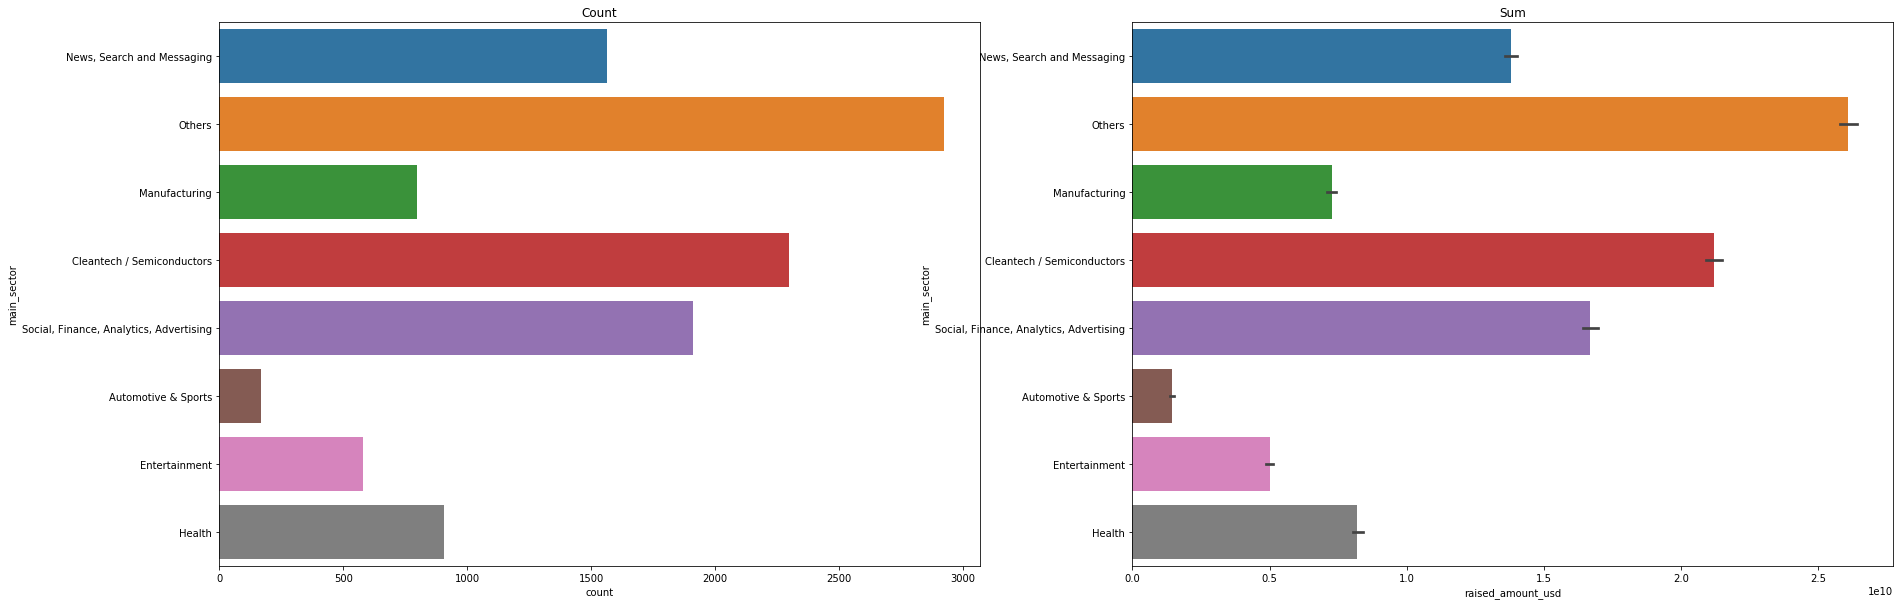

In [106]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=d1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=d1, estimator=sum)
plt.title("Sum")
plt.show()

# USA
* 'Others' is Top sector
* 'Cleantech / Semiconductors' is second sector
* 'Social, Finance, Analytics, Advertising' is third sector

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


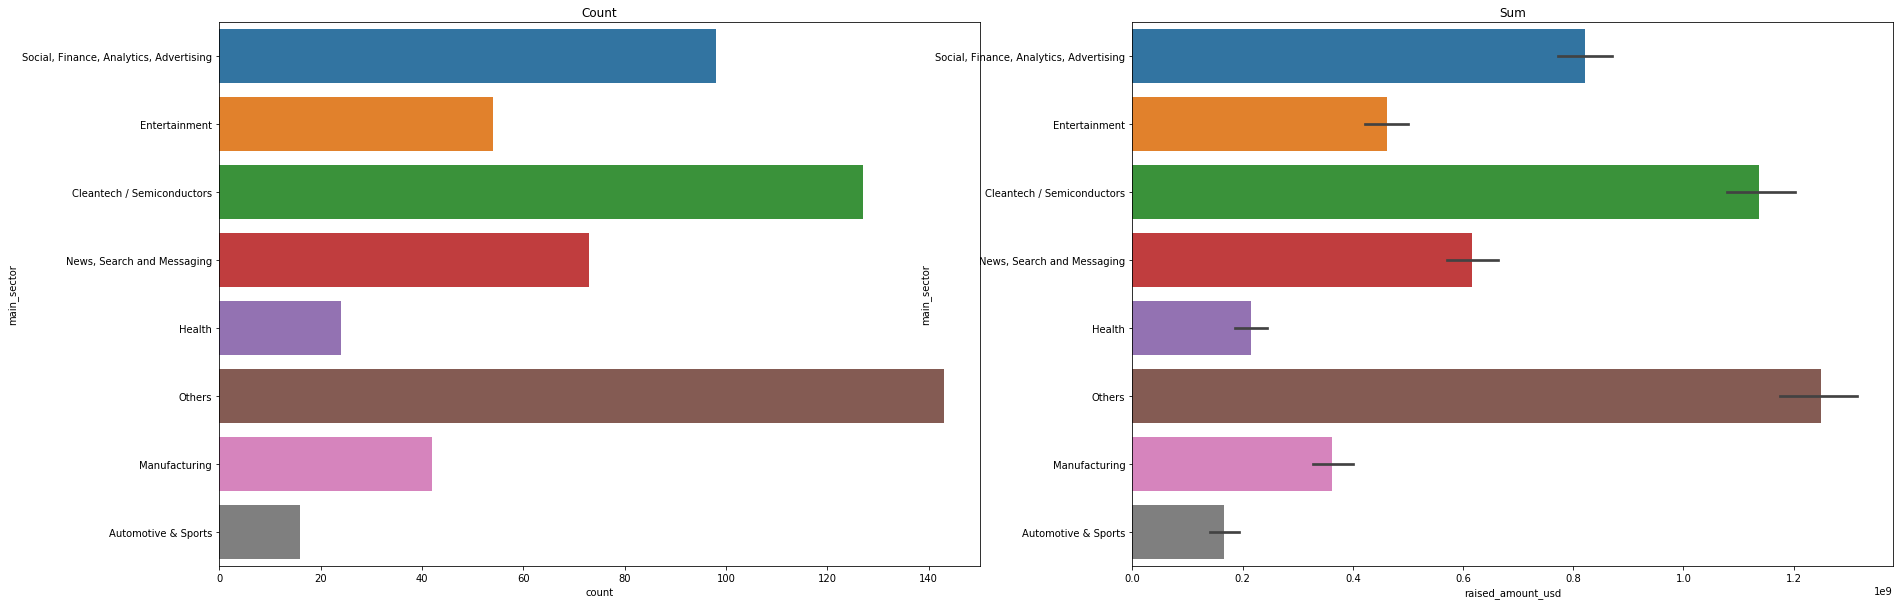

In [107]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=d2)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=d2, estimator=sum)
plt.title("Sum")
plt.show()

# GBR
* 'Others' is Top sector
* 'Cleantech / Semiconductors' is second sector
* 'Social, Finance, Analytics, Advertising' is third sector

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


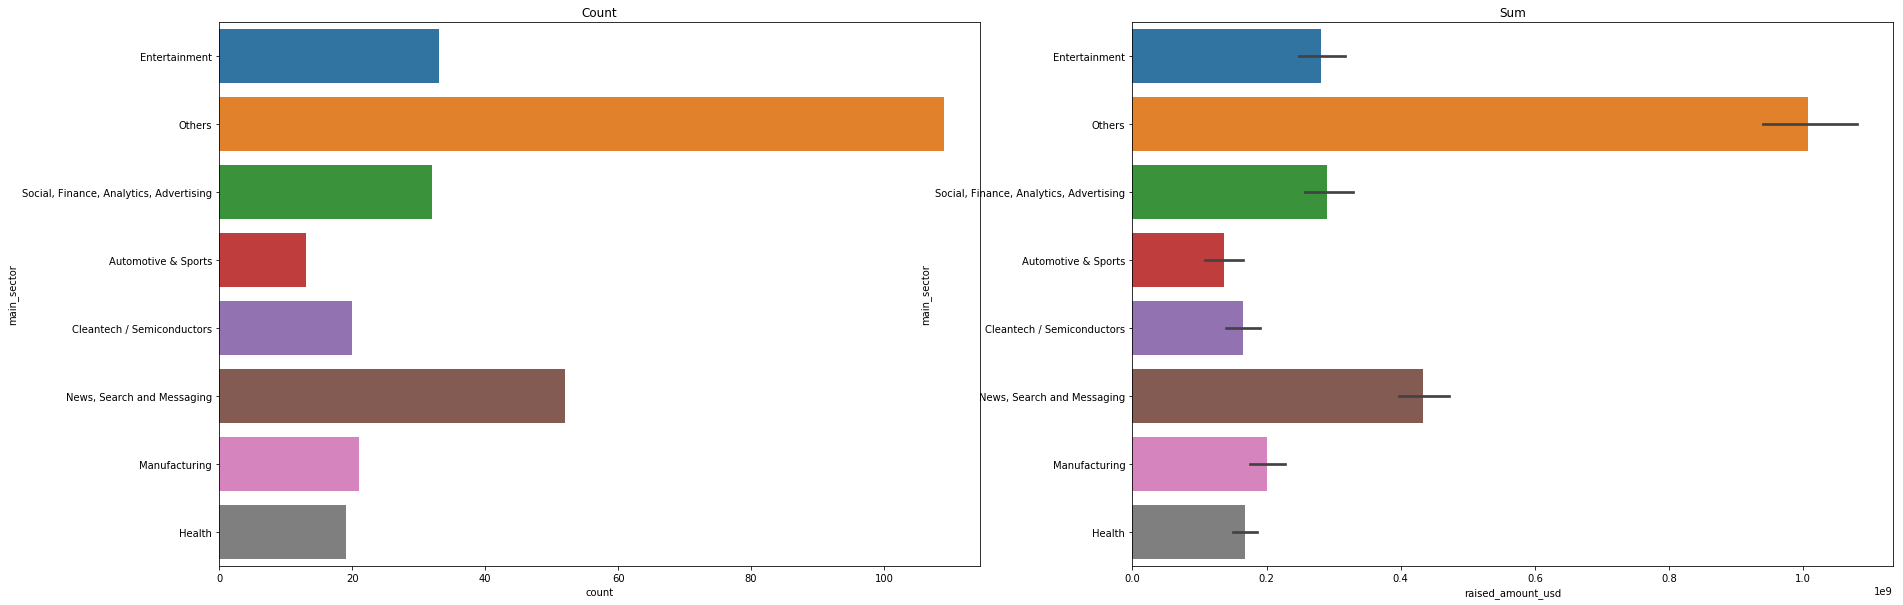

In [108]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=d3)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=d3, estimator=sum)
plt.title("Sum")
plt.show()

# IND
* 'Others' is Top sector
* 'News, Search and Messaging' is second sector
* 'Entertainment' is third sector

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


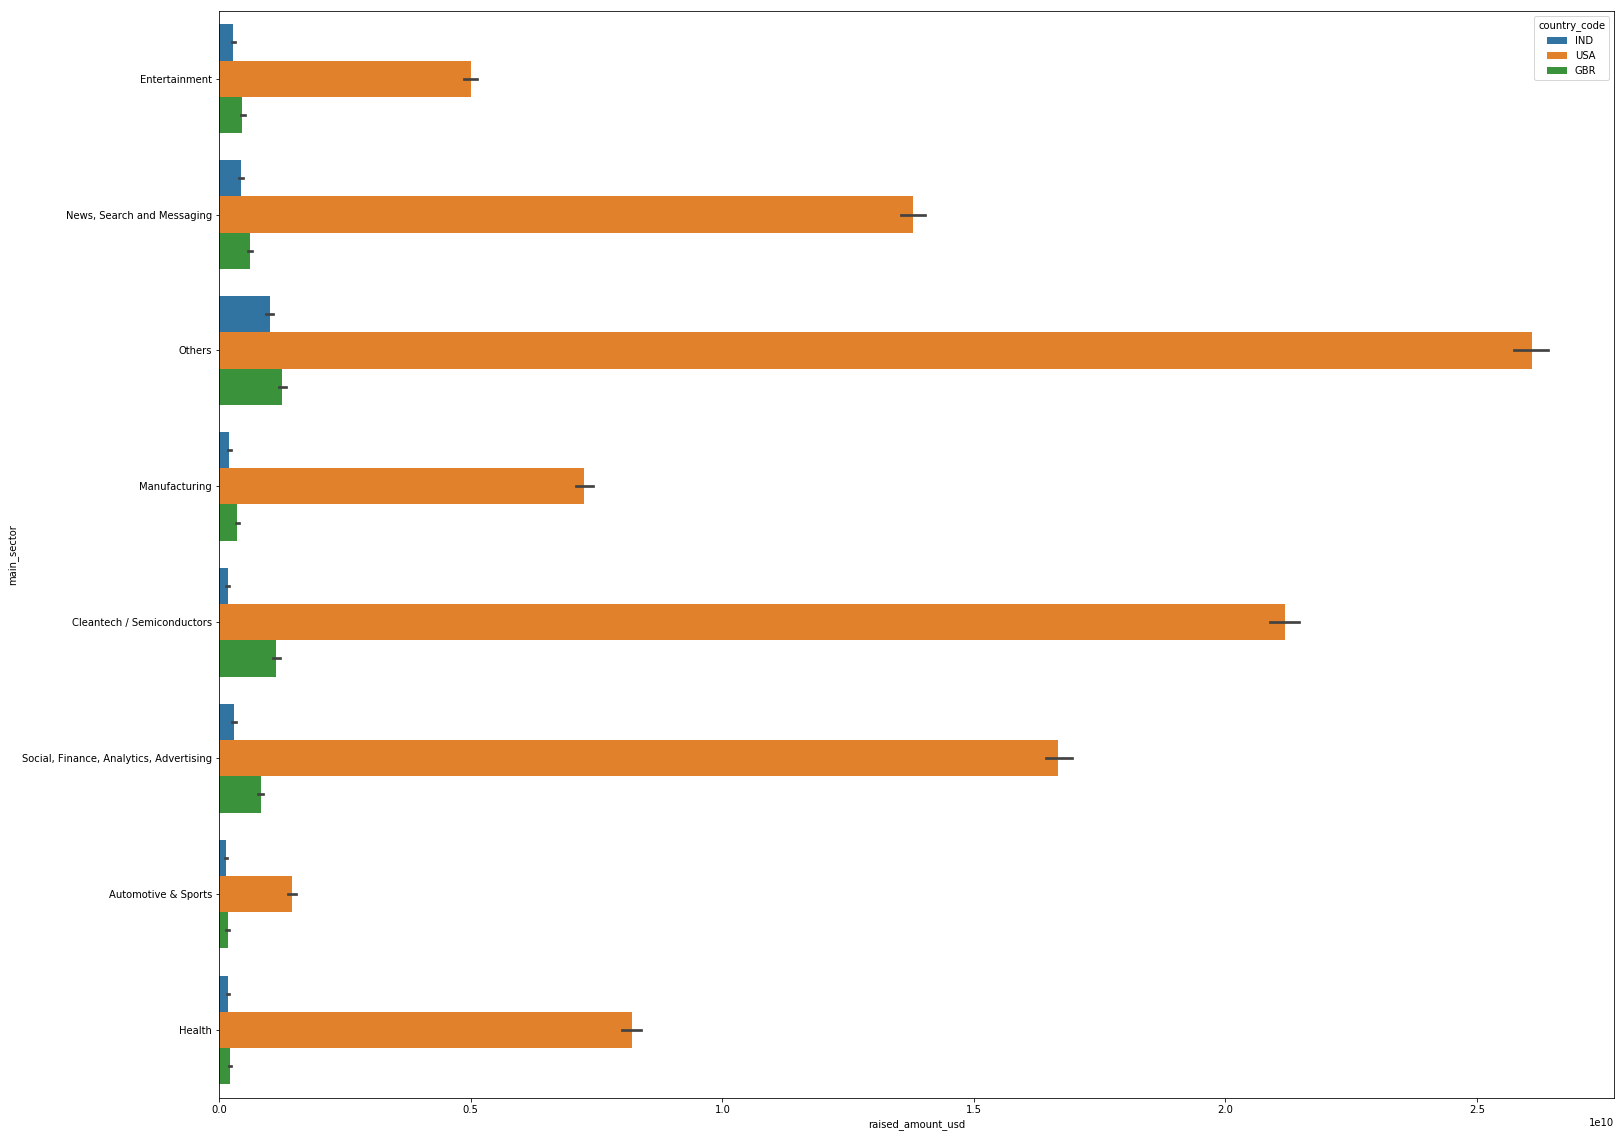

In [109]:
plt.figure(figsize=(25, 20))
sns.barplot(y='main_sector', x='raised_amount_usd', hue="country_code", data=top_eng_countries, estimator=np.sum)

plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


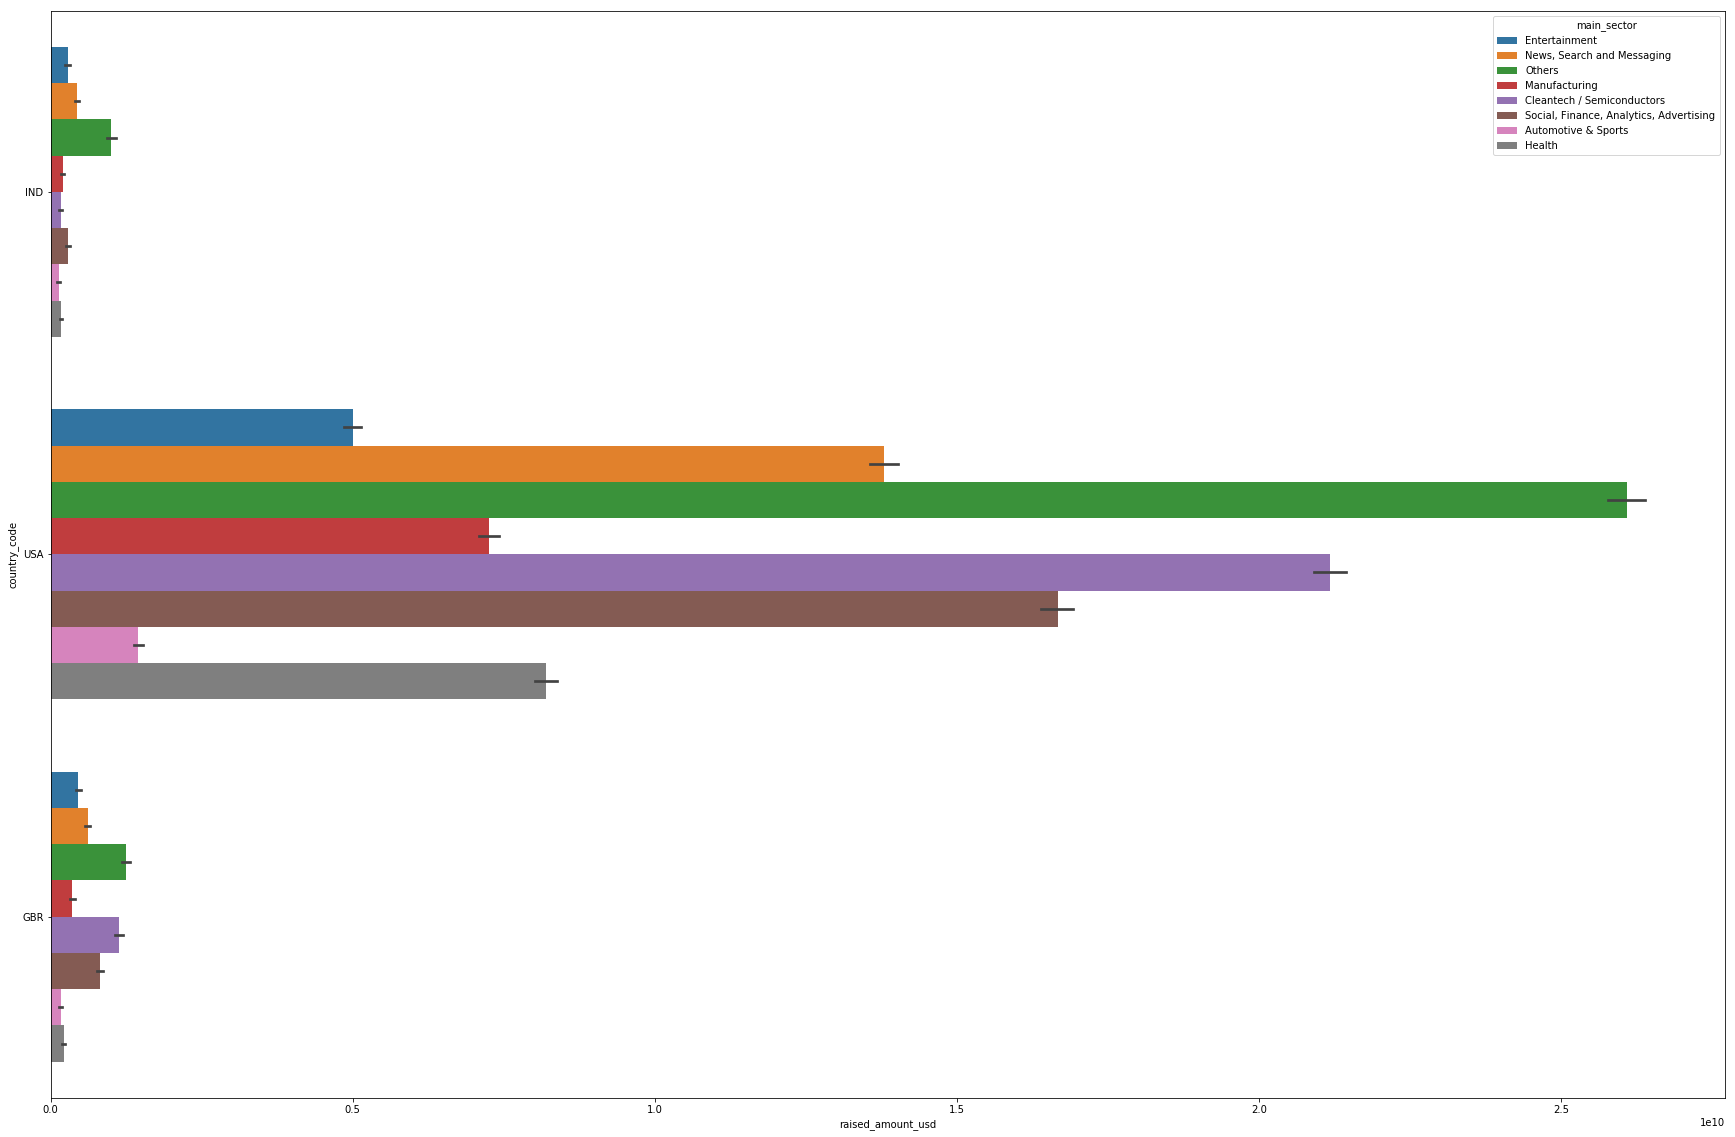

In [110]:
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=top_eng_countries, estimator=np.sum)
plt.show()

In [111]:
d1[d1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
/organization/approva                50100000.0
/organization/five9                  49600000.0
/organization/bit9                   48433533.0
/organization/aryaka-networks        48166500.0
/organization/bti-systems            48000000.0
Name: raised_amount_usd, dtype: float64

In [112]:
d2[d2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
/organization/myoptique-group            27694613.0
/organization/notonthehighstreet         26900000.0
/organization/acs-clothing               26239014.0
/organization/tribold                    26000000.0
/organization/ip-access                  25000000.0
Name: raised_amount_usd, dtype: float64

In [113]:
d3[d3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/firstcry-com                                                              39000000.0
/organization/myntra                                                                    38000000.0
/organization/commonfloor                                                               32900000.0
/organization/pepperfry-com                                                             28000000.0
/organization/itzcash-card-ltd                                                          25000000.0
/organization/nxtgen-data-center-cloud-services                                         22300000.0
/organization/maharana-infrastructure-and-professional-services-private-limited-mips    21600000.0
/organization/comat-technologies                                                        21000000.0
/organization/caratlane                                                                 21000000.0
/organization/roposo                                                                    20000000.0


In [114]:
d1[d1['main_sector'] == "Cleantech / Semiconductors" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/biodesix              75300000.0
/organization/tigo-energy           68739496.0
/organization/forsight-labs         61300001.0
/organization/rheonix               56124758.0
/organization/scienergy             55375423.0
/organization/alung-technologies    54110403.0
/organization/metabolon             52420551.0
/organization/stretch               52000000.0
/organization/irhythm               50500000.0
/organization/ocular-therapeutix    49500000.0
Name: raised_amount_usd, dtype: float64

In [115]:
d2[d2['main_sector'] == "Cleantech / Semiconductors" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/eusa-pharma                                                      35600000.0
/organization/horizon-discovery                                                31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/elixent                                                          25000000.0
/organization/takeda-cambridge                                                 22340000.0
/organization/immune-targeting-systems                                         20320961.0
/organization/plaxica                                                          19940192.0
/organization/i2o-water                                                        19491529.0
/organization/xention                                                          19051289.0
/organization/oxford-photovoltaics                                             18820357.0
Name: raised_amount_usd, dtype: float64

In [116]:
d3[d3['main_sector'] == "News, Search and Messaging" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/hike                                21000000.0
/organization/roadrunnr                           21000000.0
/organization/matrimony-com                       20400000.0
/organization/guruji                              15000000.0
/organization/bluestone-com                       15000000.0
/organization/mobile2win-india                    15000000.0
/organization/quikr-india                         14000000.0
Name: raised_amount_usd, dtype: float64

In [117]:
d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [118]:
d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [119]:
d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [121]:
d1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                     2.608928e+10
Cleantech / Semiconductors                 2.118100e+10
Social, Finance, Analytics, Advertising    1.668070e+10
News, Search and Messaging                 1.379682e+10
Health                                     8.200859e+09
Manufacturing                              7.258553e+09
Entertainment                              5.000213e+09
Automotive & Sports                        1.454104e+09
Name: raised_amount_usd, dtype: float64

In [122]:
d1['raised_amount_usd'].sum()

99661524549.0

In [123]:
d2['raised_amount_usd'].sum()

5028704358.0

In [124]:
d3['raised_amount_usd'].sum()

2683537552.0

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


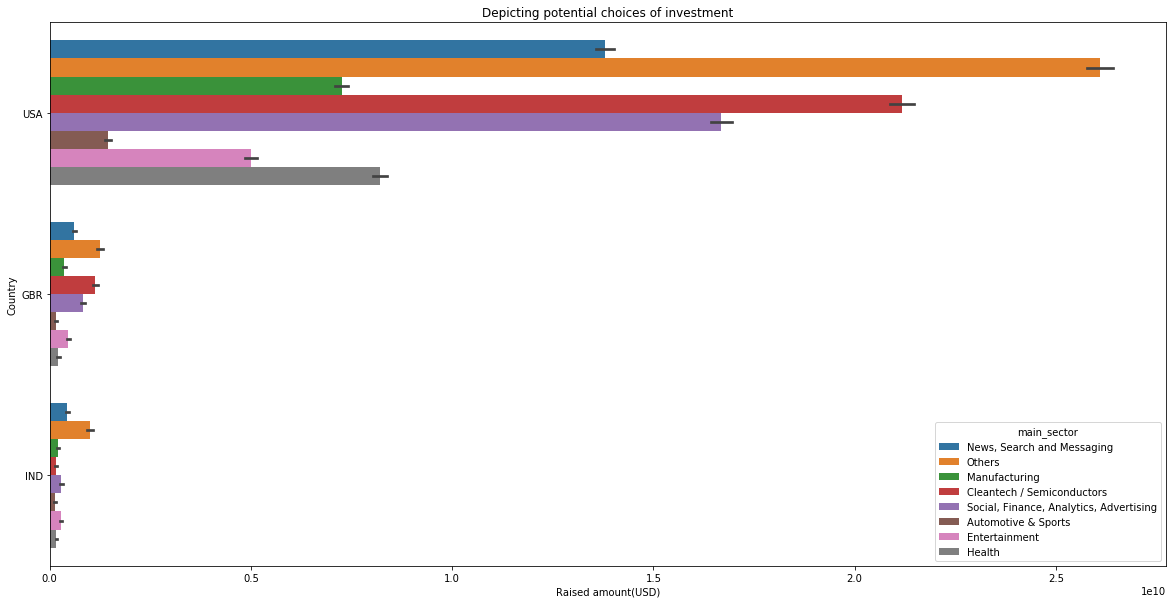

In [125]:
col_list = [d1, d2, d3]
concat_df = pd.concat(col_list)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=concat_df, estimator=np.sum)
plt.title("Depicting potential choices of investment")
plt.xlabel('Raised amount(USD)')
plt.ylabel('Country')
plt.show()